In [208]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import train_test_split
import shap 

In [209]:
df = pd.read_csv('Dataset.csv')
features = ['Feature_1','Feature_2','Feature_3']

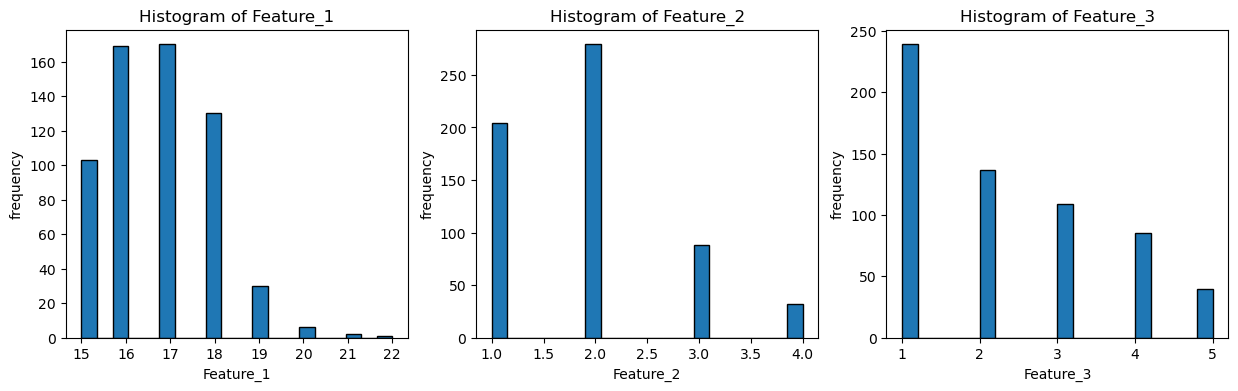

In [210]:
plt.figure(figsize=(15,4))
for i,j in enumerate(features):
    plt.subplot(1,3,i+1)
    plt.hist(df[j].dropna(),bins=20,edgecolor='black')
    plt.title(f'Histogram of {j}')
    plt.xlabel(j)
    plt.ylabel('frequency')


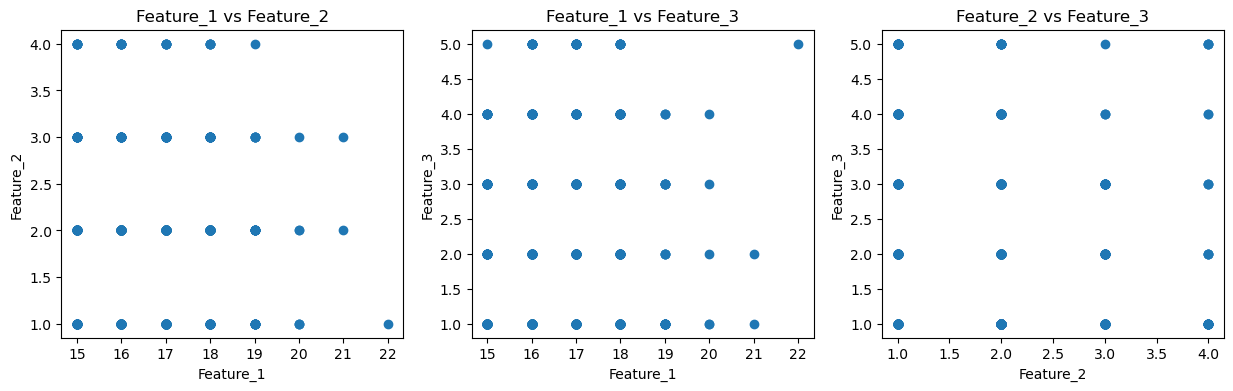

In [211]:
plt.figure(figsize=(15,4))
t = 0
j = 1
for i in range(len(features)):
    plt.subplot(1,3,i+1)
    plt.scatter(df[features[t]],df[features[j]])
    plt.xlabel(features[t])
    plt.ylabel(features[j])
    plt.title(f"{features[t]} vs {features[j]}")
    if j == len(features)-1:
        t += 1
        j = t+1
    else:
        j += 1


Text(0.5, 1.0, 'Correlation Heatmap ')

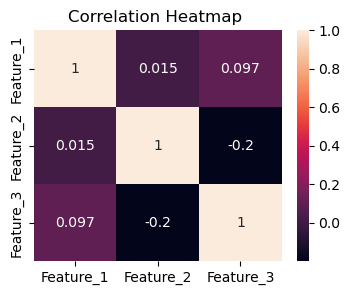

In [212]:
corr_matrix = df[features].corr()
plt.figure(figsize=(4,3))
sns.heatmap(corr_matrix,annot=True)
plt.title('Correlation Heatmap ')
 

In [213]:
df[features].describe().T

,count,mean,std,min,25%,50%,75%,max
Feature_1,611.0,16.747954,1.216812,15.0,16.0,17.0,18.0,22.0
Feature_2,603.0,1.913765,0.830798,1.0,1.0,2.0,2.0,4.0
Feature_3,610.0,2.262295,1.285279,1.0,1.0,2.0,3.0,5.0


In [214]:
df[features].isnull().sum()

Feature_1    38
Feature_2    46
Feature_3    39
dtype: int64

In [215]:
df.duplicated().sum()


np.int64(0)

Text(0.5, 1.0, 'Missing Values Heatmap')

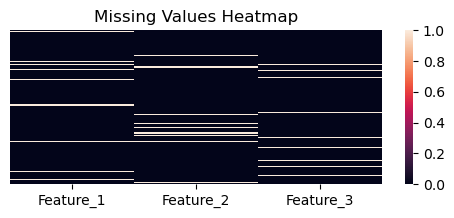

In [216]:
plt.figure(figsize=(6,2))
sns.heatmap(df[features].isnull(),yticklabels=False)
plt.title('Missing Values Heatmap')

Text(0.5, 1.0, 'Boxplot for outlier Detection')

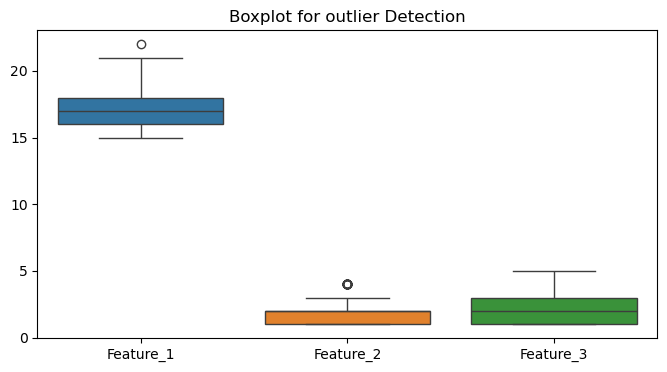

In [217]:
plt.figure(figsize=(8,4))
sns.boxplot(data=df[features])
plt.title('Boxplot for outlier Detection')

In [218]:
df_clean = df[features].dropna()
df_clean.describe().T

,count,mean,std,min,25%,50%,75%,max
Feature_1,533.0,16.767355,1.225629,15.0,16.0,17.0,18.0,22.0
Feature_2,533.0,1.915572,0.823983,1.0,1.0,2.0,2.0,4.0
Feature_3,533.0,2.230769,1.270409,1.0,1.0,2.0,3.0,5.0


Text(0.5, 0.98, 'pairwaise feature relationship')

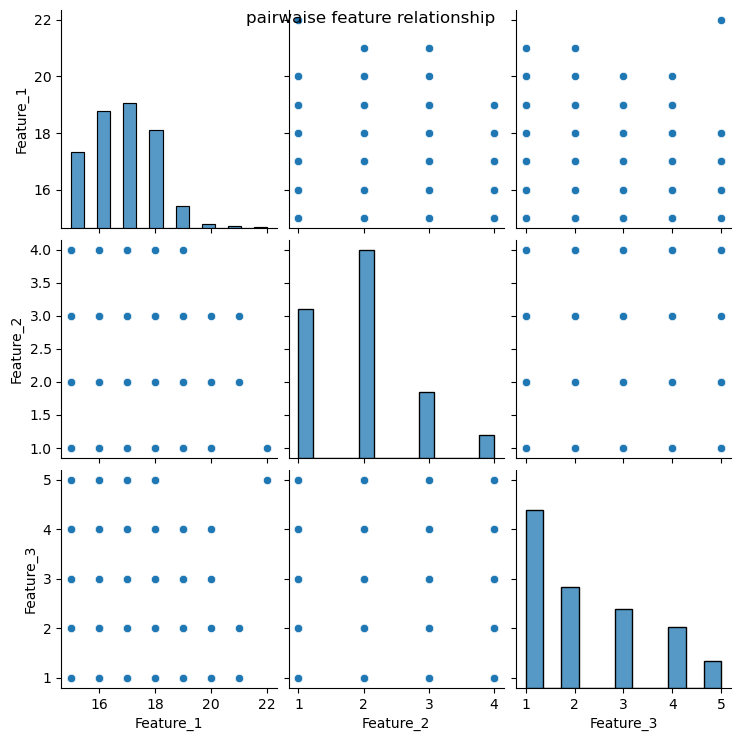

In [219]:
sns.pairplot(df_clean)
plt.suptitle('pairwaise feature relationship')

In [220]:
df[features].nunique()


Feature_1    8
Feature_2    4
Feature_3    5
dtype: int64

In [221]:
df = df.apply(lambda x:x.fillna(x.mode()[0]) if x.dtype == 'object' else x.fillna(x.median()))
df.describe

<bound method NDFrame.describe of     school sex address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F       U     GT3       A     4   4.0   at_home   teacher   
1       GP   F       U     GT3       T     1   1.0   at_home     other   
2       GP   F       U     LE3       T     1   1.0   at_home     other   
3       GP   F       U     GT3       T     4   2.0    health  services   
4       GP   F       U     GT3       T     3   3.0     other     other   
..     ...  ..     ...     ...     ...   ...   ...       ...       ...   
644     MS   F       R     GT3       T     2   3.0  services     other   
645     MS   F       U     LE3       T     3   1.0   teacher  services   
646     MS   F       U     GT3       T     1   1.0     other     other   
647     MS   M       U     LE3       T     3   1.0  services  services   
648     MS   M       R     LE3       T     3   2.0  services     other   

     reason  ... Dalc  health  absences  G1    G2  G3 Feature_1 Feature_2  \


In [222]:
features_2 = ['G1', 'G2', 'G3', 'Feature_1', 'Feature_2','goout', 'Feature_3', 'absences', 'Dalc', 'health', 'famrel']
X = df[features_2]
y = df['romantic']
y = df['romantic'].map({'yes': 1, 'no': 0})

X_train, X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42)
clf = RandomForestClassifier(n_estimators=100,random_state=42)
clf.fit(X_train,y_train)

y_predict = clf.predict(X_test)
y_probablity = clf.predict_proba(X_test)[:,1]




In [223]:
roc_auc_score(y_test, y_probablity)

np.float64(0.5471151423532377)

In [224]:
classification_report(y_test, y_predict)

'              precision    recall  f1-score   support\n\n           0       0.62      0.80      0.70        81\n           1       0.36      0.18      0.24        49\n\n    accuracy                           0.57       130\n   macro avg       0.49      0.49      0.47       130\nweighted avg       0.52      0.57      0.53       130\n'

Text(0.5, 1.0, 'Feature Importance')

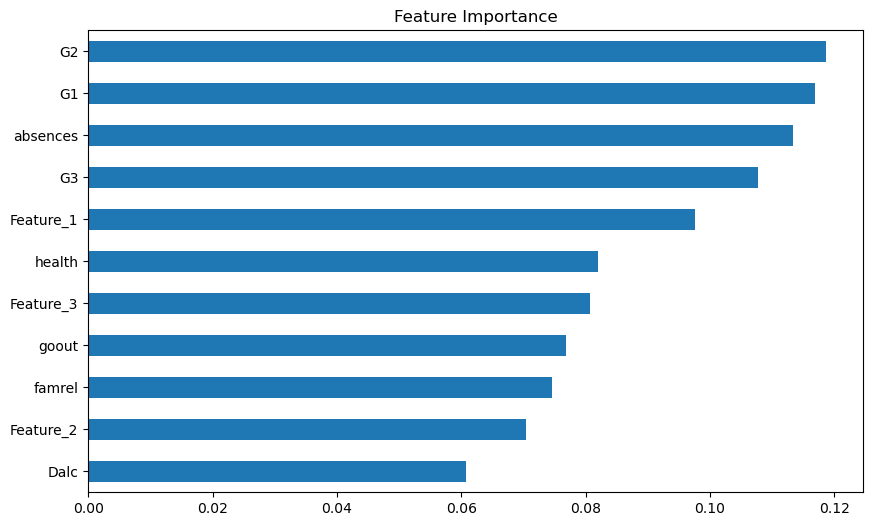

In [225]:
plt.figure(figsize=(10,6))
pd.Series(clf.feature_importances_, index=features_2).sort_values().plot.barh()
plt.title('Feature Importance')

<Figure size 640x480 with 0 Axes>

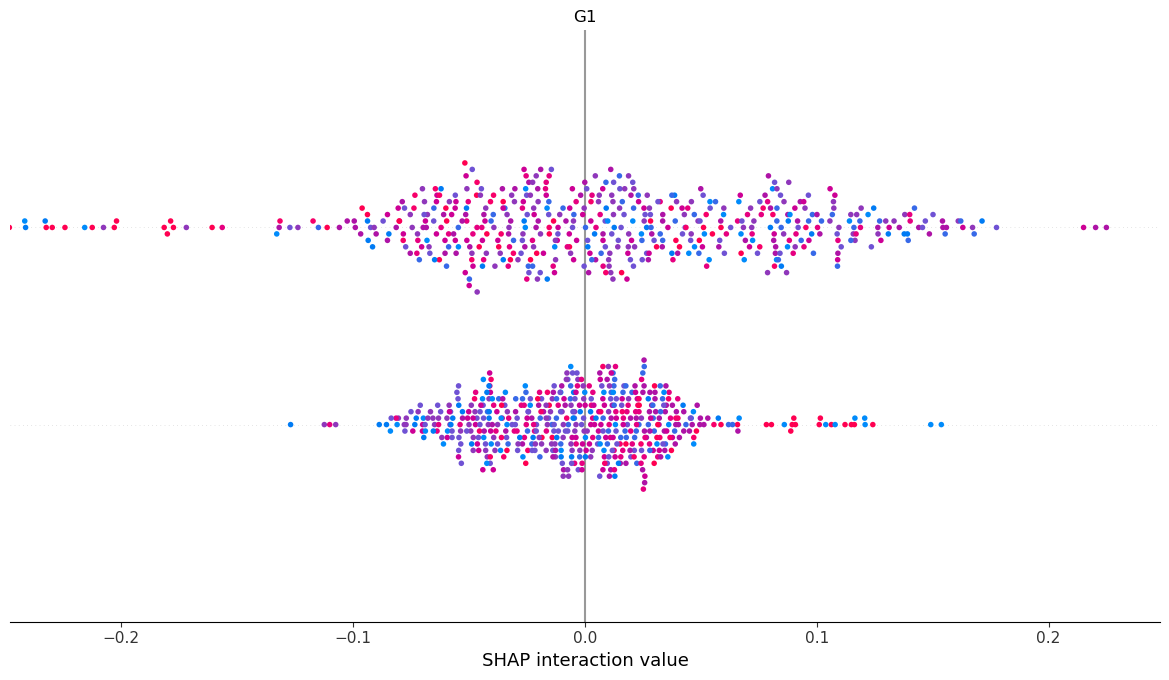

In [226]:
explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values,X_train,plot_type="bar")


In [227]:
X_train.shape

(519, 11)